In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### Project

### Summary

### Package List

In [ ]:
#import pkg_resources
#installed_packages = pkg_resources.working_set
#installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
#installed_packages_list

In [15]:
# Install Additional Packages
import io
%matplotlib inline
import matplotlib.pyplot as plt

### Load Data

In [6]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
#df_description = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", delimiter=' ')

## Combine Train/Test

In [27]:
df_train['TRAIN_INDEX'] = 1
df_train.shape

(1460, 82)

In [28]:
df_test['TRAIN_INDEX'] = 0
df_test.shape

(1459, 81)

In [26]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TRAIN_INDEX
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


## Functions

### Exploratory Data Functions

In [21]:
def histogram_numerical_plots(data):
    data_x = data.copy()
    # Select numerical columns
    num_cols = data_x.select_dtypes(include=['int64', 'float64'])
    # Create subset DataFrame with only numerical values
    data_x_num_cols = data_x[num_cols.columns]
    data_x_num_cols.hist(bins=25, figsize=(40,30))
    plt.show()

In [ ]:
# Code to determine dtypes, missing values, etc...
def analysis(read):
    
    if len(read) > 0:
        print("PROCESS HAS BEEN STARTED\n")

        print("DATA SHAPE")
        print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")

        print("EXPLORE MORE ABOUT THE DATA")
        if len(read.select_dtypes("object").columns) > 0:
            print("Object Variables:", "\n", "Variables:", 
                  len(read.select_dtypes("object").columns), "\n", 
                  read.select_dtypes("object").columns.tolist(), "\n")

        if len(read.select_dtypes("integer").columns) > 0:
            print("Integer Variables:", "\n", "VVariables:", 
                  len(read.select_dtypes("integer").columns), "\n", 
                  read.select_dtypes("integer").columns.tolist(), "\n")

        if len(read.select_dtypes("float").columns) > 0:
            print("Float Variables:", "\n", "Variables:", 
                  len(read.select_dtypes("float").columns), "\n", 
                  read.select_dtypes("float").columns.tolist(), "\n")

        if len(read.select_dtypes("bool").columns) > 0:
            print("Bool Variables:", "\n", "Variables:", 
                  len(read.select_dtypes("bool").columns), "\n", 
                  read.select_dtypes("bool").columns.tolist(), "\n")

        print("IS THERE ANY MISSING VALUE")
        print(" \n ", np.where(read.isnull().values.any() == False,"No missing value!", "Data includes missing value!"), "\n")

        buf = io.StringIO()
        read.info(buf=buf)
        check = True
        check = buf.getvalue().split('\n')[-2].split(":")[1].strip()
        print("MEMORY \n", check)

    else:
        print("ERROR!")

    return read

In [5]:
# Inspect Missing Values
def data_cleaning(df):

    print("*********{} *********".format('Inspecting missing values'))
    
    data = df.isna().sum().reset_index().sort_values(by=0, ascending=False)
    clean_data = data[data[0] != 0].shape[0]
    columns = df.shape[1]
    rows = df.shape[0]
    data.columns = ["name", "missing appearences"]
    data["%missing from total"] = data[data["missing appearences"]!=0]["missing appearences"]/rows
    mis_data = data[data["%missing from total"] > 0.5].shape[0]
    #drop_data = np.array(data[data["%missing from total"] > 0.5]["name"])
    
    print("{}/{} total missing data in terms of column shape.".format(clean_data, columns))
    #print("{}/{} columns  will be dropped. name of the drop column is {}".format(mis_data, columns,drop_data))
    
    return data#, drop_data

In [ ]:
# Univariate Analysis (Compare Train/Test Splits)
def univariate_eda(data, target, var) -> dict:
    if data[var].dtype == 'object':
        data[var] = np.where(data[var].isna(), "NaN", data[var])
        train = data.loc[data['TRAIN_INDEX'] == 1]
        test = data.loc[data['TRAIN_INDEX'] == 0]
        train_grp = train[[var,target]].groupby(var).agg(['count','mean'])
        test_grp = test[[var,target]].groupby(var).agg(['count','mean'])
        grp = pd.merge(train_grp, test_grp, how='outer', left_index=True, right_index=True)
        grp.columns = ['count_train', 'severity_train', 'count_test', 'severity_test']
        print(grp)
        
        count_max = max([max(grp['count_train']),max(grp['count_test'])])
        sev_max = max([max(grp['severity_train']).max(grp['severity_test'])])
        
        df_count = grp[['count_train', 'count_test']].copy()
        df_sev = grp[['severity_train', 'severity_test']].copy()
        
        x = np.arrange(len(df_count.index))
        width = 0.3
        multiplier = 0 
        
        fig, ax1 = plt.subplots(constrained_layout=True)
        
        for attribute, measurement in df_count.items():
            offset = width + multiplier
            rects = ax1.bar(x + offset, measurement, width, label=attribute)
            multiplier += 1
            
        ax1.set_title('numerical: ' + var)
        
        ax1.set_ylabel('Counts')
        ax1.set_xticks(x)
        ax1.set_xticklabels(df_count.index, rotation=90)
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.set_ylabel('Severity')
        ax2.plot(df_sev.index, df_sev['severity_train'], c='blue', label='severity_train')
        ax2.plot(df_sev.index, df_sev['severity_test'], c='darkorange', label='severity_test')
        ax2.legend(loc='upper right')
    else:
        data_temp = data.copy()
        data_temp['DECILE'] = pd.qcut(data_temp[var], 10, labels=False, duplicates='drop')                   
        temp = data.copy()
        temp['DECILE'] = pd.qcut(temp[var], 10, duplicates='drop')
        data_grp = temp[['DECILE', target]].groupby('DECILE').agg(['count','mean']).reset_index()
        data_grp.columns = [var+'_BOUNDARY', 'count', 'severity']
        data_grp = data_grp.drop(['count', 'severity'], axis=1)
        
        train = data_temp.loc[data_temp['TRAIN_INDEX'] == 1]
        test = data_temp.loc[data_temp['TRAIN_INDEX'] == 0]
        
        train_temp = train.copy()
        train_grp = train_temp[['DECILE', target]].groupby('DECILE').agg(['count','mean'])
        train_grp.columns = ['count_train', 'severity_train']
        
        test_temp = test.copy()
        test_grp = test_temp[['DECILE', target]].groupby('DECILE').agg(['count','mean'])
        test_grp.columns = ['count_test', 'severity_test']
        
        grp = pd.merge(data_grp, train_grp, how='outer', left_index=true, right_index=True)
        grp = pd.merge(grp, test_grp, how='outer', left_index=true, right_index=true)
        
        df_count = grp[['count_train', 'count_test']].copy()
        df_sev = grp[['severity_train', 'severity_test']].copy()
        
        x = np.arrange(len(df_count.index))
        width = 0.3
        multiplier = 0
        
        fig, ax1 = plt.sublpots(constrained_layout=True)
        
        for attribute, measurement in df_count.items():
            offset = width * multiplier
            rects = ax1.bar(x + offset, measurement, width, label=attribute)
            multiplier +=1
            
        ax1.set_title('numerical: ' + var)
        
        ax1.set_ylabel('Counts')
        ax1.set_xticks(x)
        ax1.set_xticklabels(df_count.index, rotation=90)
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        ax2.set_ylabel('Severity')
        ax2.plot(df_sev.index, df_sev['severity_train'], label='severity_train')
        ax2.plot(df_sev.index, df_sev['severity_test'], label='severity_test')
        ax2.legend(loc='upper right')

In [ ]:
# Understanding Outliers

## Cook's Distance

## Leverage



In [ ]:
# Variable Correlation Analysis

## VIF Calculations

## Correlation Matrix

## Principal Component Analysis (PCA)

## 


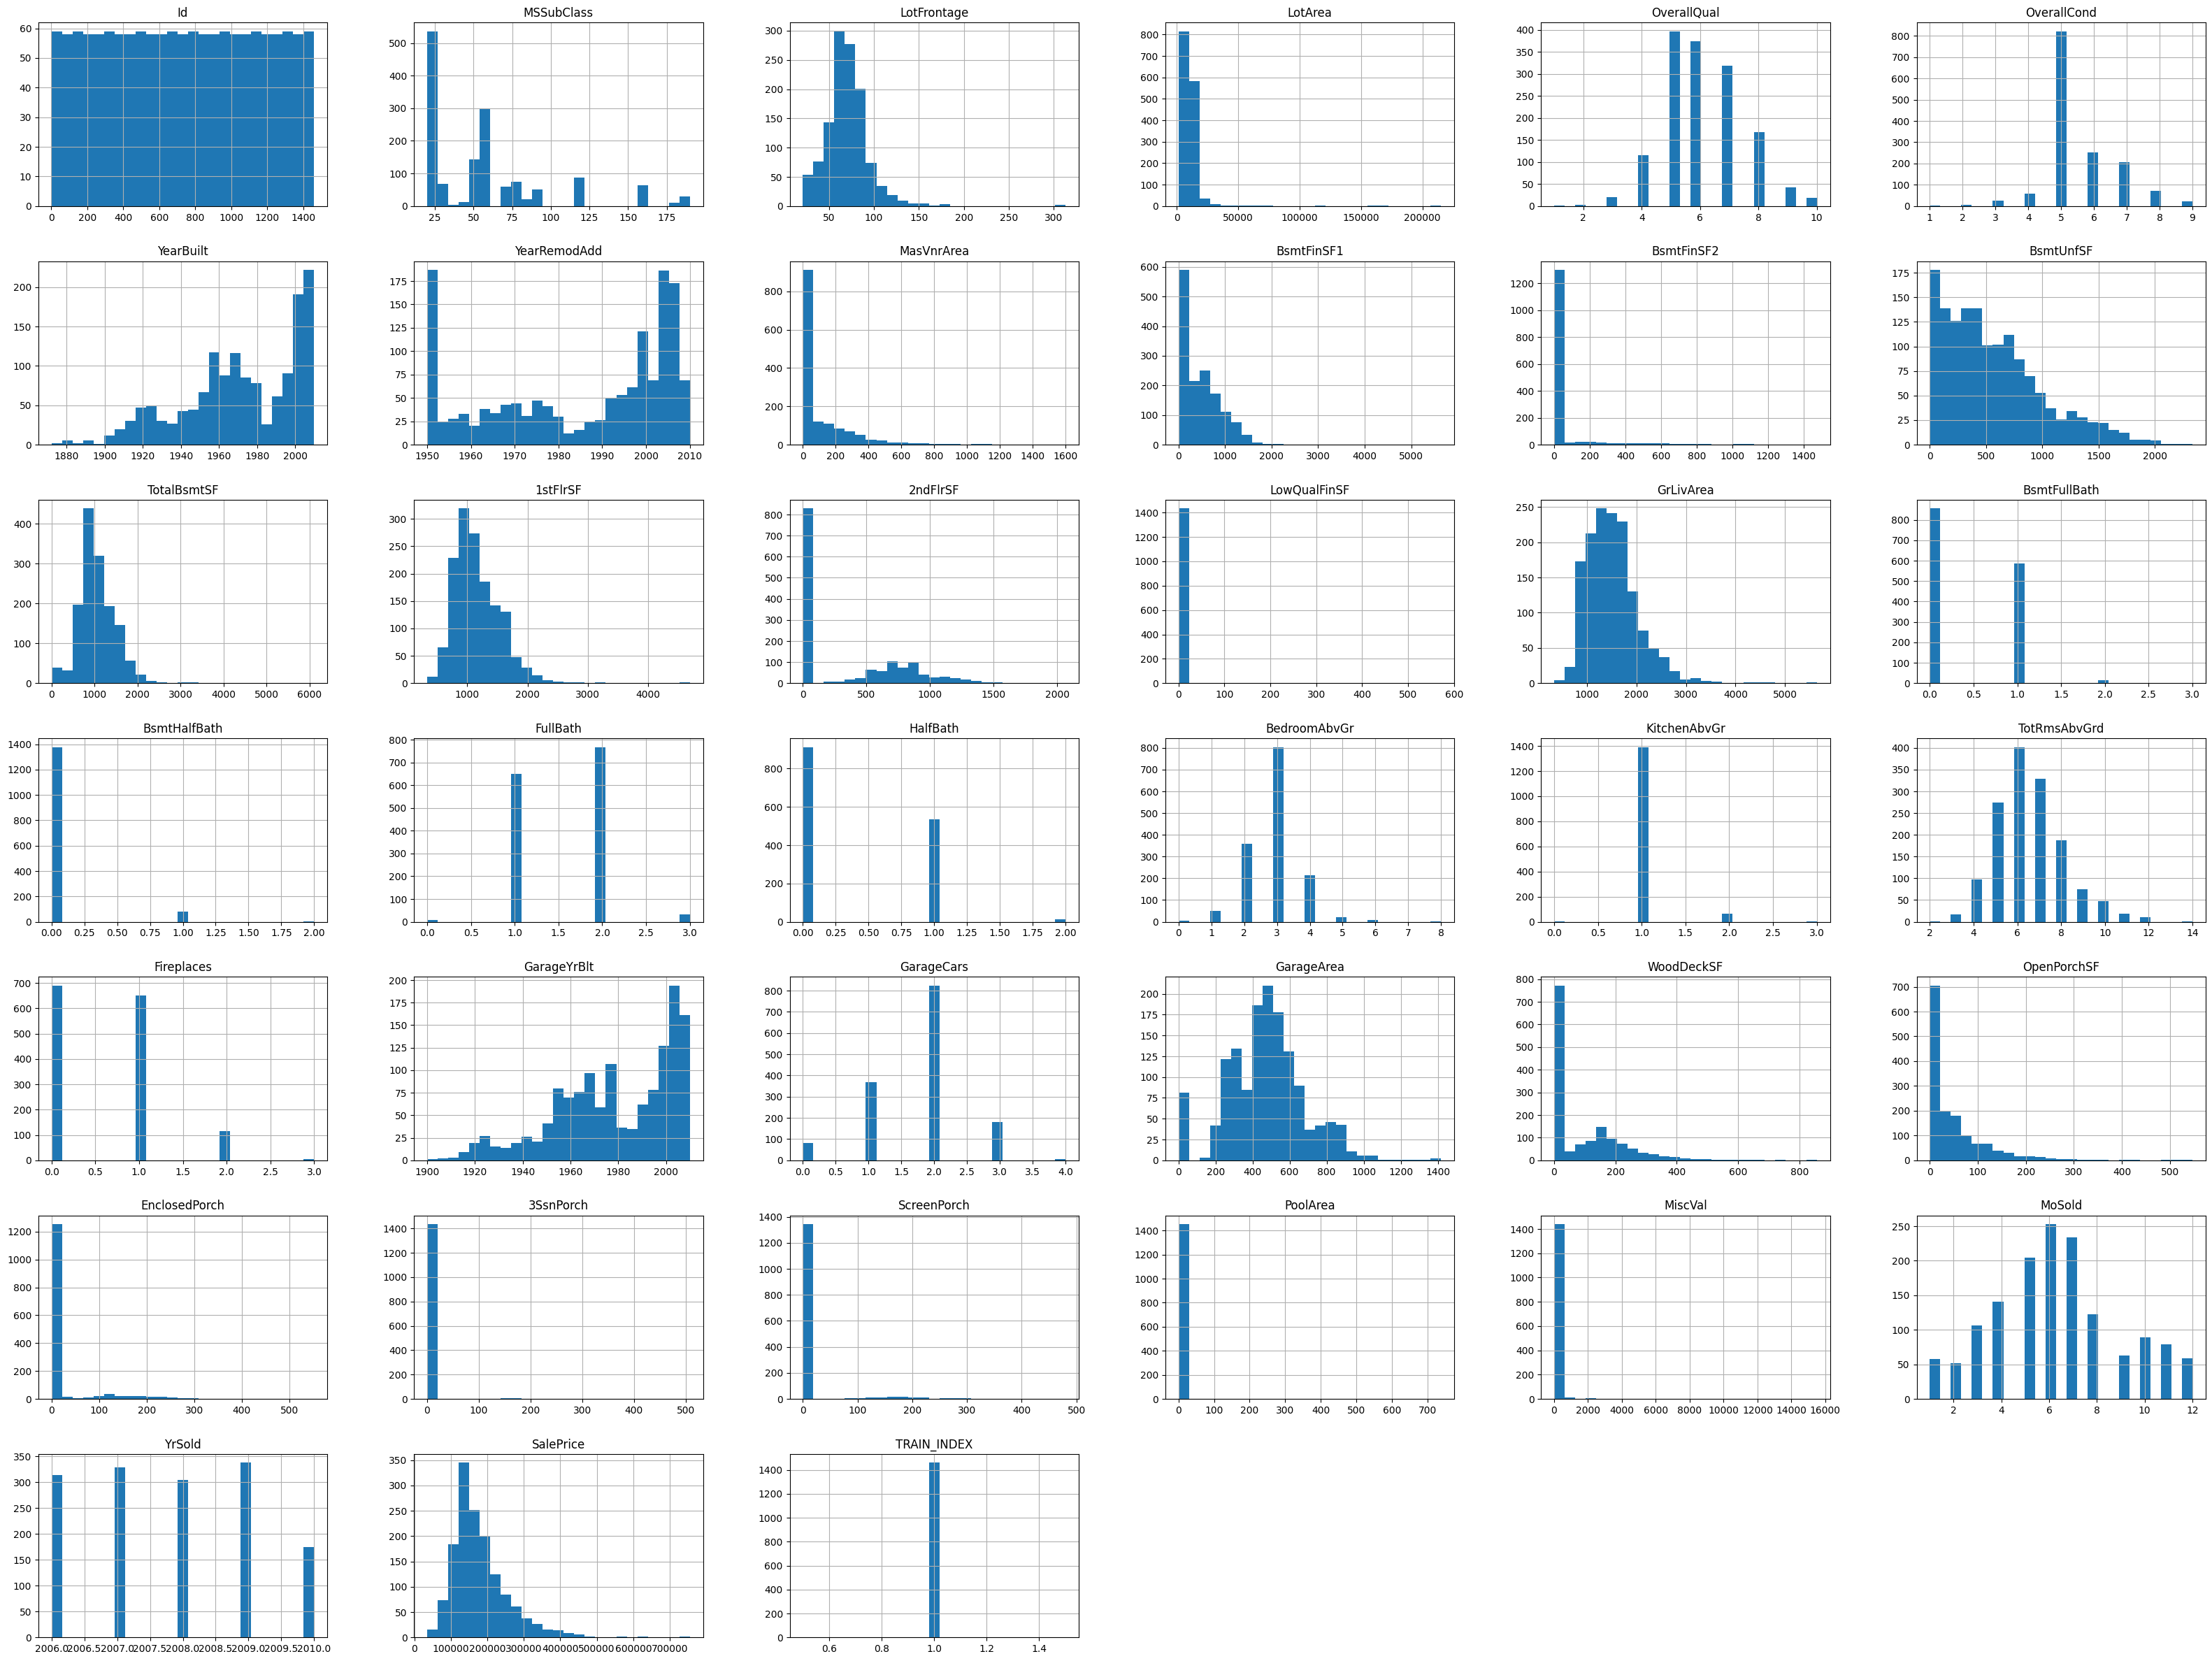

In [22]:
### Exploratory Data Analysis
histogram_numerical_plots(df_train)

### Create Modeling Functions

In [ ]:
# Train/Test Split

In [ ]:
# Step-Wise


In [ ]:
# GLM Models

## Gamma

## Inverse Gaussian

## Logistic/Binomial

## Multinomial

## Normal

## Poisson


In [ ]:
# Random Forest

In [ ]:
# Decision Tree (CART)

In [ ]:
# Lasso Model


In [ ]:
# Ridge Model


In [ ]:
# Elastic Net


In [ ]:
# Gradient Boosting Machine


In [ ]:
# Support Vector Machine


In [ ]:
# Neural Network


### Data Analysis

In [ ]:
# Execute Analysis, Data Cleaning Functions
output = analysis(df_train)
missing = data_cleaning(df_train)
missing_data = data_cleaning(df_train)
missing_data.head(20)